# Introduction to agent-based modelling
Agent-based models (ABM) are a class of computational models that simulate the dynamics of interacting, autonomous agents. The goal is to gain insight into the collective behaviour of agents that follow simple rules.

In this module you will learn what ABMs are, how they are constructed, and how you can visualise and analyse the results of an ABM.

## What are agent-based models
Agent-based simulations are characterised by three key elements
* Modularity
* Complexity
* Emergence

**Modularity** means that individuals can be easily added and removed from a running system (e.g. birth/death, growing/shriking population size), and that rules can be easily changed without the need to change the entire model.

The notion of **complexity** refers to the ability to allows complex low-level interactions, and changes to agents' and the environments characteristics as the simulation is going on. 

**Emergence** describes the fact that local interactions among agents can lead to higher level patterns.

## Examples for agent-based models
ABM are a widely distributed tool to understand a large variety of complex systems, which are often to complicated to study with formal mathematical approaches. 

* Ecosystem and natural-resource management 
* Land-use and agricultural policy
* Control disease outbreaks
* Marketing
* Private-sector logistics and strategy 
* Stock exchange
* Electoral design
* Social media dynamics
* Emergency escape planning 
* Traffic planning

<div class="alert alert-block alert-info">
<b>Agent-based and mathematical models do not oppose each other</b> but complement each other. Both have different strengths and weaknesses.
</div>

## When are agent-based models useful?
* In-silico experiments
* Asses effect of interventions and policies 
* Help plan data collection 
* Occourence of 
    * Learning
    * Conditional behaviour changes in the agents
    * Imitation
    * Communication
    * Evolution
* Need for 
    * Geographical representation 
    * Social network structures 
* Emergence (bottom-up) 

## Challenges for agent-based modellers
**Generalisations are often not possible** 
Statements only hold for those parameter(s/ sets) that have been simulated

**Defining rules, agents, and the environment**
Important to choose, motivate, and justify behavioural rules, agent and environmental characteristics

_Important pitfall: programming desired results into the model mechanics._

## Best practice in agent-based modelling
1. **Start with a clear question or goal** and let this drive early modelling decisions
2. **Take an “agent” perspective** in initial design, identifying key actors in the system that will be the focus of the model
3. **Start with (relatively) simple models** and build up complexity iteratively, one step at a time
4. **Assumptions should be well grounded** and have a strong motivation
5. **Use care in translating** the ABM design into computational code
6. **Conduct error-checking** and partial testing as models are implemented
7. **Retrieve a known, neutral case** with the model (e.g. ideal-free distribution)
8. **Fully document model** specification and implementation, and maintain up-to-date documentation throughout the process
9. Conduct thorough and appropriate **sensitivity analysis**
10. **Design clear experiments** to yield clear insights
11. **Always investigate surprising results**, and make sure that you understand how they arise
12. **Draw appropriate conclusions** from the model analysis

<div class="alert alert-block alert-warning">
<b>Always:</b> <b>Verify</b> (debug code to ensure it's behaving as expected) <b>and Validate</b> (make sure you build the right model)!
</div>

## The components of an agent-based model
ABMs can contain many different layers of interactions and a large number of acting players. However, we can generalise and say that all ABMs consist of two parts: **Agents** and **Context**.

**Agents** are the actors that follow **rules**, perform **actions**, and have a set of **properies** that define them. Their actions happen in an **environment** and over a set amount of or a long with **time**, which represents the **context**. Let us have a closer look at these terms and what they mean. 

**Properties**
* What defines the individual? (age, sex, size, wealth, etc.)
* Are these properties fixed or can they change throughout simulation?

**Actions**
* What can the individual do? (move, eat, communicate or learn from neighbour)
* Do activities affect only the individual, or also neighbours and the environment?

**Rules** 
* Based on environmental input, or time, or others’ states or behaviours?

**Time**
* The unit in which rules, actions, and changes in agent properties or the environment occur
* Can be fixed for all components, or vary e.g. spread of information in a network versus the change in the network topology

**Environment**
* Structure of the environment (e.g. lattice, ring, torus, checkerboard) * Can change over time (e.g. turnover of quality of resources patches)

## Developing agent-based models
1. Define question and goal of the simulation model
2. Model scope and conceptual design
    * informed choice of key concepts, structures, relationships (from literature)
3. Model specification
    * decisions on how to implement components from step 2 in a simulation model
4. Model implementation
    * translating concepts and components into a executable program and run with test parameters
5. Analysis
    1. Testing, calibration, debugging
        * check whether model behaves as expected and adjust if necessary
    2. Designing experiments and conducting analysis
        * use model to test hypothesis
    3. Sensitivity analysis
        * sweep parameter space to identify where small changes in parameter values can cause drastic changes in model outcomes and to test the effect of assumptions that have been made during model design
6. Synthesis and reporting
    * compile statistical analysis and visualisations

## Creating your own ABM
Now, we turn to our first, very simple and familiar scenario, Rock-Paper-Scissors. In this first example, we will model two agents choosing one of three strategies and playing against each other. 
<img src="http://1.bp.blogspot.com/-Oqw3HgaijTM/TxcrYpgpdlI/AAAAAAAAAag/c9NcMHs--dM/s1600/rock-paper-scissors-1r0r6th.jpg" alt="Rock-Paper-Scissors" title="" />

### Rock-Paper-Scissors – Simple
We start by setting the data structures that keep tack of the states of the two agents (i.e. their strategy) and the number of times each agent won a game:

In [2]:
strategy = zeros(Int, 2)

2-element Array{Int64,1}:
 0
 0

In [3]:
num_wins = zeros(Int, 2)

2-element Array{Int64,1}:
 0
 0

We use the `zeros()` function to create a one-dimensional array (or simply: a vector) of zeros of length `2`, where all entries are of the type `Int`eger. 

We now have two individuals that we can identify based on their position in the array (i.e. individual 1 is in position `1` of the array, etc.), they have a __strategy__ (which they have not chosen yet), and an __indicator for success__, here number of winning turns.

In the next step we need to define some rules to let individuals interact with each other

### First: Every individual chooses a strategy
We start by defining a function that simulates individuals choosing a strategy:

In [4]:
using Distributions
function chooseStrategy(STRAT)
    STRAT .= sample(1:3,length(STRAT),replace=true)
    return STRAT
end

chooseStrategy (generic function with 1 method)

This function replaces the strategies by both players with a random sample of the numbers one to three (`1:3`). It samples two values (i.e. the `length` of the strategy vector we hand over to the function), with replacement (i.e. both individuals might choose the same strategy).

<div class="alert alert-block alert-info">
<code>using Distributions</code> is a call to the Distributions library, which contains the <code>sample</code> function. 
</div>

Let us try out our new function:

In [5]:
strategy

2-element Array{Int64,1}:
 0
 0

In [6]:
strategy = chooseStrategy(strategy);
strategy

2-element Array{Int64,1}:
 2
 1

### Second: Individuals play their strategies
Next, we write a function that evaluates the strategy choices of both agents and increases the win counter for the successful individual (or does nothing in case of a tie). We assume the following order of strategies: 1 Paper, 2 Scissors, 3 Rock.

In [7]:
function playStrategy(STRAT, WIN)
    # do nothing if:
    if STRAT[1]==STRAT[2]
    # in the case that one chose Rock and the other chooses Paper:
    elseif any(STRAT.==3) & any(STRAT.==1)
        WIN[STRAT.==1] .+= 1;
    # for the two other cases, the better weapon wins:
    else
        WIN[STRAT .== maximum(STRAT)] .+= 1;
    end
    return WIN
    end     

playStrategy (generic function with 1 method)

<div class="alert alert-block alert-info">
<b>Tip:</b> Use variable names inside your functions that are different from those outside your function to avoid confusing local and global variables. Here, we will always use upper-case names for those variables that are handed over to the functions and thus act globally, whereas those that are calculated locally, inside a function are in lower-case.
</div>

### Third: Let's loop it
Let us write a function that quickly sets up our game, such that both the strategy vector and the number of wins vector is set to `0` again:

In [8]:
function setup()
    STRAT = zeros(Int, 2)
    WIN   = zeros(Int, 2)
    return STRAT, WIN
end

strategy, num_wins = setup()

([0, 0], [0, 0])

We have all ingridients for a simulation. What we need to do now is to let our agents choose a strategy and play their strategy against each other repeatedly:

In [9]:
# Set up game
strategy, num_wins = setup()
# Let players play
for i in 1:1000
    strategy = chooseStrategy(strategy);
    num_wins = playStrategy(strategy, num_wins);
end

println("Player 1 won ",num_wins[1]," times, whereas player 2 won ",num_wins[2]," times.")

Player 1 won 329 times, whereas player 2 won 339 times.


Congratulations to your first rule based two-player simulation. 

You may have noticed, that we only see the final result but did not retrieve any intermediate results. How can we monitor what happens throughout the simulatinos to get a better feeling of the dynamics? Here, we will simply return the number of wins in every round and store these in an additional data structure, `dat`:

In [10]:
rounds = 1000;
strategy, num_wins = setup()
dat = zeros(Int, rounds, 2)
for i in 1:1000
    strategy = chooseStrategy(strategy);
    num_wins = playStrategy(strategy, num_wins);
    dat[i,:] = num_wins;
end

Now, we have the time-series data of each player's wins. Let us plot the results:

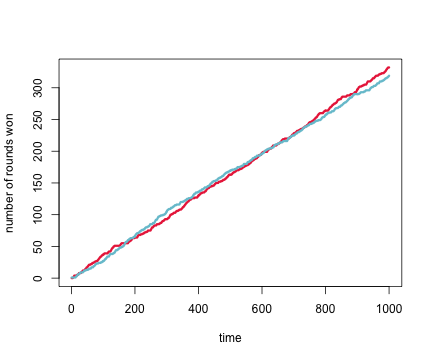

In [11]:
using RCall # call R compatibility library
@rput dat; # hand over dat to R environment
R""" 
    plot(dat[,1], type='l', col='#EA2E49', lwd=3, xlab='time', ylab='number of rounds won')

    lines(dat[,2], col='#77C4D3', lwd=3)
""";

If you run this simulation repeatedly you will find that there will never be one player that always wins. Instead, sometimes one player wins more often and then the other will. Both will track each other, with makes sense, given that both players play random strategies.

<div class="alert alert-block alert-success">
<b>Exercise 1:</b> Come up and implement a strategy that is different from randomly choosing among rock, paper, scissors. For example, try to change the code we developed above such that one player will choose a strategy once and then stick with it for the entire game, whereas the other player keeps randomly picking a strategy. Which player (if any) will dominate?
</div>

## Rock, Paper, Scissors – On a network
In this second example we are going to use the same game, but this time several individuals will play against each other. To make it more interesting individuals are organised on a lattice network. Thus, they can only play with their direct neighbors. A loser will copy the strategy of the winner. The question is, what are the strategy dynamics over time and in relation to the network configuration. (You can see this as a very simple example of an evolutionary process)

┌ Warning: RCall.jl: Lade nötiges Paket: igraph
│ 
│ Attache Paket: ‘igraph’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     decompose, spectrum
│ 
│ The following object is masked from ‘package:base’:
│ 
│     union
│ 
└ @ RCall /Users/marco/.julia/packages/RCall/Q4n8R/src/io.jl:110
┌ Warning: RCall.jl: Lade nötiges Paket: reshape2
└ @ RCall /Users/marco/.julia/packages/RCall/Q4n8R/src/io.jl:110


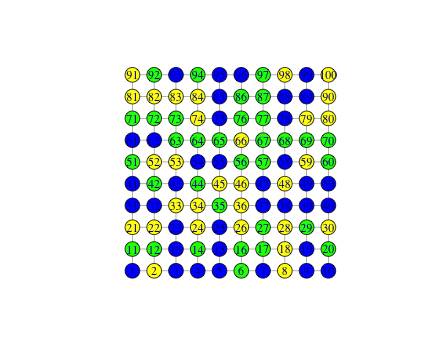

┌ Warning: RCall.jl: Lade nötiges Paket: ggplot2
└ @ RCall /Users/marco/.julia/packages/RCall/Q4n8R/src/io.jl:110


RObject{NilSxp}
NULL


In [12]:
R"""
require(igraph)
require(reshape2)
require(ggplot2)

# size of the lattice
sidelength <- 10 

# creating an empty data.frame to store data
stat <- data.frame()

# creating a lattice network using the igraph package
l <- graph.lattice(length=sidelength,dim=2)

# now every individual chooses a strategy at random
V(l)$weapon <- sample(c(1:3), size=length(V(l)), replace=T)

# for a nicer visualisation lets colour the different options
V(l)[weapon==1]$color <- 'blue' # Paper
V(l)[weapon==2]$color <- 'yellow' # Scissors
V(l)[weapon==3]$color <- 'green' # Rock

# and this is what it looks like:
plot(l, layout=as.matrix(expand.grid(1:sidelength, 1:sidelength)) ) #, vertex.label=NA
"""

Now that we have a structured (networed) population of players, we can let them play against each other. We will randomly pick one player and then choose one of its neighbours to compete against. The loser will adopt the strategy of the winner. To observe what happens over time, we will keep track of the number of players of each strategy and plot the result at the end. 

In [13]:
R"""
for(t in 1:3500){
	# pick a random agent ...
	from <- sample(sidelength^2,1)
	# who are its neighbours?
	nei <- neighbors(l, v=from, mode='all')
	
	# if there is only one weapon type left
	if(length(unique(V(l)$weapon))==1) {
		# we can either stop the simulation
		# stop(paste(c('Paper','Scissors','Rock')[unique(V(l)$weapon)], 'has won the game after',t,'rounds!'))
		# or we let the selected individual choose a different strategy to let the dynamics go on
		V(l)$weapon[from]<-sample((1:3)[1:3!=as.numeric(V(l)$weapon[from])], 1)
	} else {
		# ... and one of its neighbours
		to <- sample(nei, 1) 
		fromto <- c(from,to)
		w<-as.numeric(V(l)$weapon[fromto])
		# if both choices are equal, nothing happens:
		if(w[1]==w[2]) {} else{ 
			# in the case that one chooses Rock and the other Paper, Paper wins:
			if(max(w) == 3 && min(w) ==1) { 
				V(l)$weapon[fromto[w==3]] <- "1" 
			} 
			else{
				# for the two other cases, the better weapon wins:
				V(l)$weapon[fromto[w==min(w)]] <- V(l)$weapon[fromto[w==max(w)]]
			}
		} 
		
	}
	# let's record the individual abundance of each strategy
	stat <- rbind(stat, c(sum(V(l)$'weapon'=="1"), sum(V(l)$'weapon'=="2"), sum(V(l)$'weapon'=="3")))
	
}
""";

┌ Warning: RCall.jl: No id variables; using all as measure variables
└ @ RCall /Users/marco/.julia/packages/RCall/Q4n8R/src/io.jl:110


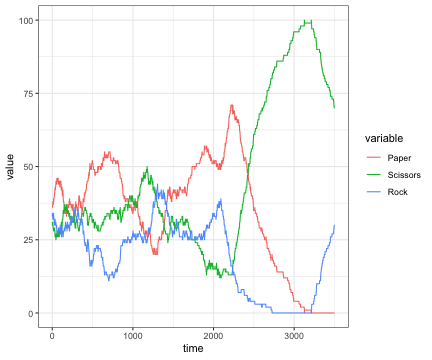

RObject{VecSxp}


In [14]:
R"""
names(stat)<-c("Paper","Scissors","Rock")
s<-melt(stat)
s$time<-1:nrow(stat)
ggplot(data=s, mapping=aes(x=time, y=value, col=variable)) + geom_line() + theme_bw()
"""

We have not create a very simple agent-based simulation. However, this model could be a lot more interesting, for example, to investigate the effect of different network topologies on the strategy dynamics in the network. 

<div class="alert alert-block alert-success">
<b>Exercise 2:</b> Change the code such that there are four or five strategies competing with each other. What happens to the dynamics?
</div>

<div class="alert alert-block alert-success">
<b>Exercise 3:</b> Change the above model to use random graphs and scale-free networks instead of the simple lattice network. Scale-free networks are controlled by two parameters $k$ (degree), and $\gamma$ (preferential attachment). Random graphs can be controlled by the parameters $m$ (total number of edges) and $n$ (the number of nodes). 

For the scale-free version change $\gamma$ and observe how this changes the strategy dynamics. Can you explain what happens for larger and small values of $\gamma$? 

For the random graphs version vary the number of edges and observe how this changes the strategy dynamics. How are these results related to the those you observed for the scale-free version? 

Note: when you create random graphs there is a chance that you will receive unconnected nodes (i.e. having no neighbours). You need to consider this in your model. Find a way to deal with unconnected nodes and justify your decision. 
</div>

## Recommended reading
**Bialek et al., 2012**. "Statistical mechanics for natural flocks of birds." _Proceedings of the National Academy of Sciences_ 109.13: 4786-4791.

**Bonabeau, 2002**. Agent-based modeling: Methods and techniques for simulating human systems. _Proceedings of the National Academy of Sciences_, 99(Supplement 3), 7280–7287.

**Hammond, 2015**. Considerations and Best Practices in Agent- Based Modeling to Inform Policy. In Assessing the use of agent-based models for tobacco regulation. Washington, DC: The National Academies Press.